In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.ml.datasets import *
from qiskit import BasicAer
from qiskit.aqua import run_algorithm, QuantumInstance
from qiskit.aqua.input import ClassificationInput
from qiskit.aqua.components.feature_maps import SecondOrderExpansion
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

In [2]:
from qiskit import IBMQ
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

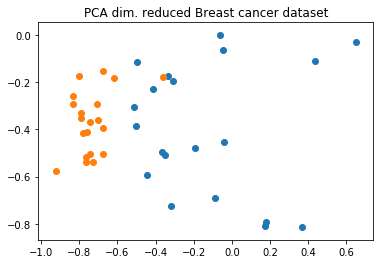

{'A': 0, 'B': 1}


C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\operators\common.py:258: DeprecationWarning: The Pauli.numberofqubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the Pauli.num_qubits method instead.
  state_registers = QuantumRegister(pauli_list[0][1].numberofqubits)
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\operators\common.py:273: DeprecationWarning: The Pauli.numberofqubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the Pauli.num_qubits method instead.
  n_qubits = pauli[1].numberofqubits
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\operators\common.py:258: DeprecationWarning: The Pauli.numberofqubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the Pauli.num_qubits method instead.
  state_registers = QuantumRegister(pauli_list[0

In [4]:
feature_dim = 2 # dimension of each data point
training_dataset_size = 20
testing_dataset_size = 10
random_seed = 10598
shots = 1024
num_qubits = 2

sample_Total, training_input, test_input, class_labels = breast_cancer(
    training_size=training_dataset_size, 
    test_size=testing_dataset_size, 
    n=feature_dim, plot_data=True
)
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

backend = BasicAer.get_backend('qasm_simulator')
feature_map = SecondOrderExpansion(feature_dimension=feature_dim, depth=2, entangler_map=[[0, 1]])
svm = QSVM(feature_map, training_input, test_input, None)# the data for prediction can be fed later.
svm.random_seed = random_seed
quantum_instance = QuantumInstance(backend, shots=shots, seed_simulator=random_seed, seed_transpiler=random_seed)
result = svm.run(quantum_instance)

kernel matrix during the training:


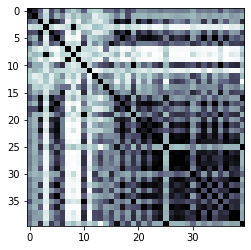

testing success ratio:  0.8


In [5]:
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()
#data= np.asmatrix(kernel_matrix)
print("testing success ratio: ", result['testing_accuracy'])

In [6]:
predicted_labels = svm.predict(datapoints[0])

predicted_classes = map_label_to_class_name(predicted_labels, svm.label_to_class)
print("ground truth: {}".format(datapoints[1]))
print("prediction:   {}".format(predicted_labels))

C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\operators\common.py:258: DeprecationWarning: The Pauli.numberofqubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the Pauli.num_qubits method instead.
  state_registers = QuantumRegister(pauli_list[0][1].numberofqubits)
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\operators\common.py:273: DeprecationWarning: The Pauli.numberofqubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the Pauli.num_qubits method instead.
  n_qubits = pauli[1].numberofqubits
C:\ProgramData\Anaconda3\lib\site-packages\qiskit\aqua\operators\common.py:258: DeprecationWarning: The Pauli.numberofqubits method is deprecated as of 0.13.0, and will be removed no earlier than 3 months after that release date. You should use the Pauli.num_qubits method instead.
  state_registers = QuantumRegister(pauli_list[0

ground truth: [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
prediction:   [0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1]
